# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | villa emilio carranza
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | toliara
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | togur
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | sarandi
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | stanley
Processing Record 16 of Set 1 | happy valley-goose bay
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | mahajanga
Processing Record 19 of Set 1 | hami
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of 

Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | osorno
Processing Record 46 of Set 4 | kill devil hills
Processing Record 47 of Set 4 | porto empedocle
Processing Record 48 of Set 4 | songea
Processing Record 49 of Set 4 | callao
Processing Record 0 of Set 5 | salamanca
Processing Record 1 of Set 5 | yagry
City not found. Skipping...
Processing Record 2 of Set 5 | kulia village
City not found. Skipping...
Processing Record 3 of Set 5 | auki
Processing Record 4 of Set 5 | jiexiu
Processing Record 5 of Set 5 | tobelo
Processing Record 6 of Set 5 | saipan
Processing Record 7 of Set 5 | praia
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | hunchun
Processing Record 11 of Set 5 | whitehorse
Processing Record 12 of Set 5 | tommot
Processing Record 13 of Set 5 | remire-montjoly
Processing Record 14 of Set 5 | constantia
Processing Record 15 of Set 5 | puerto francisco de orellana
Processing Record 16 of Se

Processing Record 37 of Set 8 | yinchuan
Processing Record 38 of Set 8 | la ronge
Processing Record 39 of Set 8 | laghouat
Processing Record 40 of Set 8 | antofagasta
Processing Record 41 of Set 8 | st. john's
Processing Record 42 of Set 8 | novodvinsk
Processing Record 43 of Set 8 | plunge
Processing Record 44 of Set 8 | abadeh
Processing Record 45 of Set 8 | chengdu
Processing Record 46 of Set 8 | hoshangabad
Processing Record 47 of Set 8 | new norfolk
Processing Record 48 of Set 8 | nehe
Processing Record 49 of Set 8 | yemva
Processing Record 0 of Set 9 | nouadhibou
Processing Record 1 of Set 9 | hinton
Processing Record 2 of Set 9 | saratamata
City not found. Skipping...
Processing Record 3 of Set 9 | cole harbour
Processing Record 4 of Set 9 | yuzhno-sukhokumsk
Processing Record 5 of Set 9 | charters towers
Processing Record 6 of Set 9 | tabarka
Processing Record 7 of Set 9 | lazaro cardenas
Processing Record 8 of Set 9 | itanagar
Processing Record 9 of Set 9 | praia da vitoria
Pr

Processing Record 22 of Set 12 | banda
Processing Record 23 of Set 12 | bay roberts
Processing Record 24 of Set 12 | chakari
Processing Record 25 of Set 12 | shiyan
Processing Record 26 of Set 12 | namdrik
Processing Record 27 of Set 12 | greytown
Processing Record 28 of Set 12 | gamba
Processing Record 29 of Set 12 | dhanwar
Processing Record 30 of Set 12 | impfondo
Processing Record 31 of Set 12 | the pas
Processing Record 32 of Set 12 | tlaltenango de sanchez roman
Processing Record 33 of Set 12 | rio branco
Processing Record 34 of Set 12 | timimoun
Processing Record 35 of Set 12 | brisas de zicatela
Processing Record 36 of Set 12 | al burayqah
Processing Record 37 of Set 12 | antibes
Processing Record 38 of Set 12 | atamyrat
Processing Record 39 of Set 12 | kudymkar
Processing Record 40 of Set 12 | launceston
Processing Record 41 of Set 12 | caleta de carquin
Processing Record 42 of Set 12 | port saint john's
Processing Record 43 of Set 12 | agat village
Processing Record 44 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,24.87,87,100,2.24,US,1689527259
1,villa emilio carranza,19.9667,-96.6000,30.42,60,72,2.30,MX,1689527259
2,grytviken,-54.2811,-36.5092,-5.44,75,41,1.61,GS,1689527259
3,edinburgh of the seven seas,-37.0676,-12.3116,13.04,80,11,13.51,SH,1689527260
4,geraldton,-28.7667,114.6000,5.23,87,0,4.63,AU,1689527260


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.87,87,100,2.24,US,1689527259
1,villa emilio carranza,19.9667,-96.6000,30.42,60,72,2.30,MX,1689527259
2,grytviken,-54.2811,-36.5092,-5.44,75,41,1.61,GS,1689527259
3,edinburgh of the seven seas,-37.0676,-12.3116,13.04,80,11,13.51,SH,1689527260
4,geraldton,-28.7667,114.6000,5.23,87,0,4.63,AU,1689527260


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

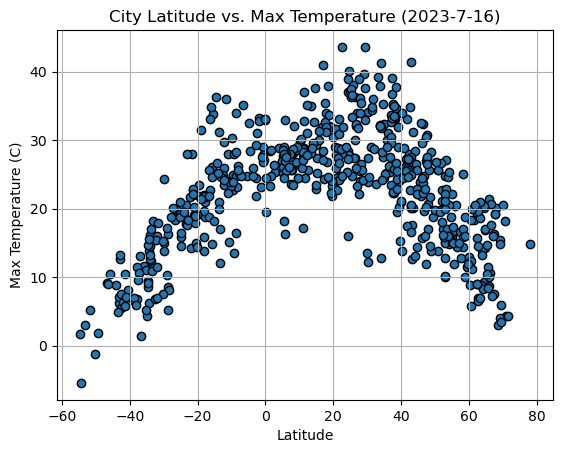

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-7-16)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

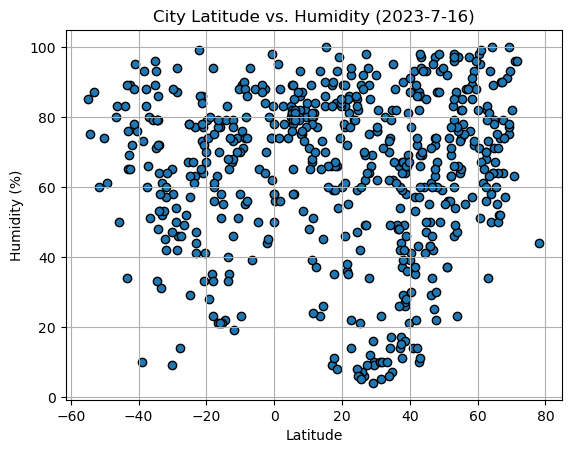

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-7-16)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

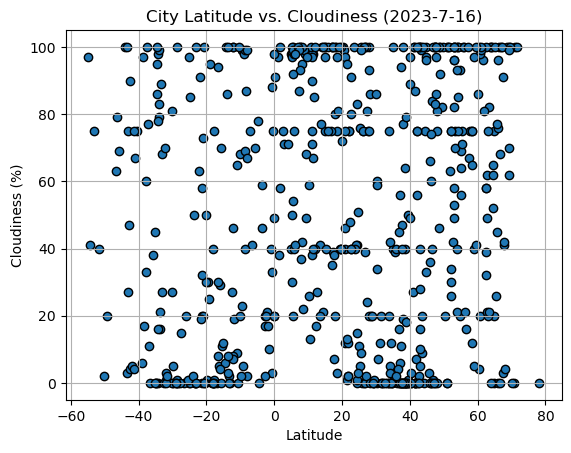

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-7-16)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

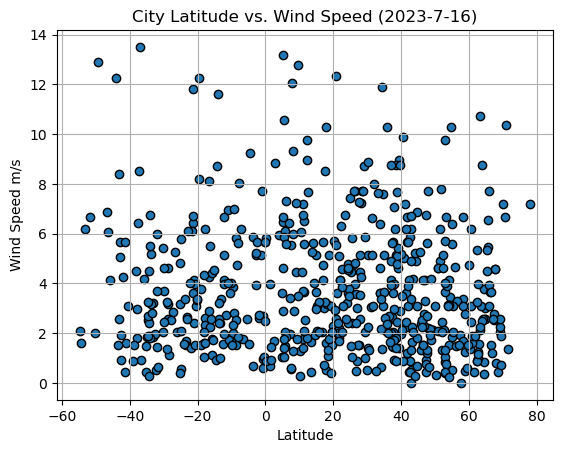

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('City Latitude vs. Wind Speed (2023-7-16)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def regress_plot(x_values, y_values, annotate_x, annotate_y, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (annotate_x, annotate_y), fontsize=15, color="red")
    print(f"The r-squared is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0, :])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,24.87,87,100,2.24,US,1689527259
1,villa emilio carranza,19.9667,-96.6000,30.42,60,72,2.30,MX,1689527259
5,nantucket,41.2835,-70.0995,26.08,93,100,7.20,US,1689527024
7,yellowknife,62.4560,-114.3525,19.20,68,39,5.36,CA,1689527260
8,kapuskasing,49.4169,-82.4331,18.84,59,82,2.12,CA,1689527260


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0, :])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,-5.44,75,41,1.61,GS,1689527259
3,edinburgh of the seven seas,-37.0676,-12.3116,13.04,80,11,13.51,SH,1689527260
4,geraldton,-28.7667,114.6000,5.23,87,0,4.63,AU,1689527260
6,toliara,-23.3500,43.6667,20.51,77,0,1.67,MG,1689527260
9,port-aux-francais,-49.3500,70.2167,1.91,61,20,12.92,TF,1689527260


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3850128383114895


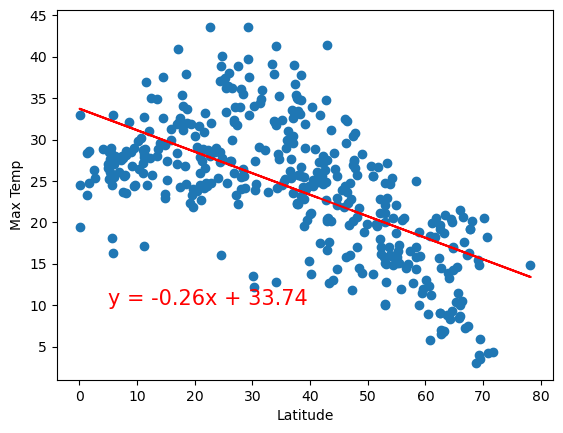

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regress_plot(x_values, y_values, 5, 10, "Latitude", "Max Temp")
plt.show()

The r-squared is: 0.7215418314586026


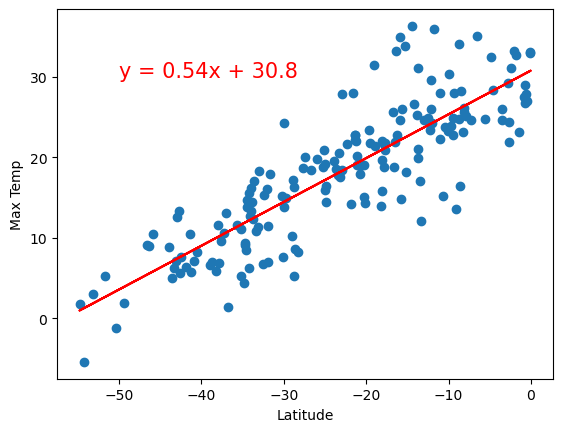

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regress_plot(x_values, y_values, -50, 30, "Latitude", "Max Temp")
plt.show()

**Discussion about the linear relationship:** When reviewing the relationships between maximum temperature and latitude in both the northern and southern hemispheres, it is evident that they are strongly correlated. The northern hemisphere has a fairly strong negative correlation, indicating that as latitudes move further away from the equator, their maximum temperature generally decreases. The southern hemisphere mirrors this relationship, meaning that it has a strong positive correlation between latitude and temperature. As the latitudes move closer to the equator, the maximum temperature generally increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0021174028883297414


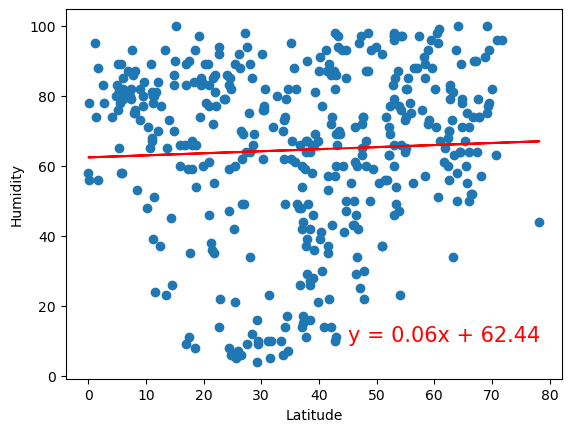

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
regress_plot(x_values, y_values, 45, 10, "Latitude", "Humidity")
plt.show()

The r-squared is: 0.0018338750298074473


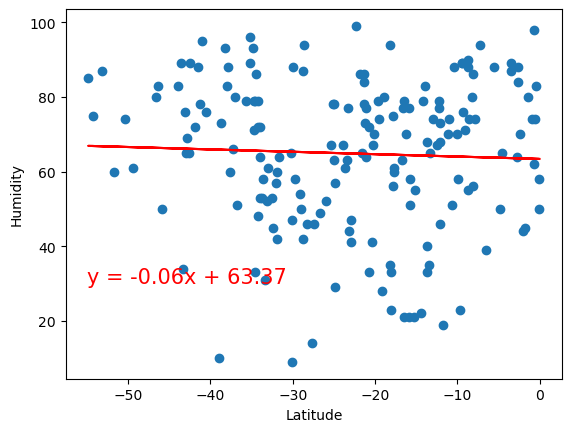

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
regress_plot(x_values, y_values, -55, 30, "Latitude", "Humidity")
plt.show()

**Discussion about the linear relationship:** Humidity and latitude do not appear to be correlated, regardless of hemisphere. The r-squared values for both relationships is less that 0.1, indicating that there is little to no correlation between the data. The value for the northern hemisphere is slightly higher, but not enough to be statistically significant.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00216774652168553


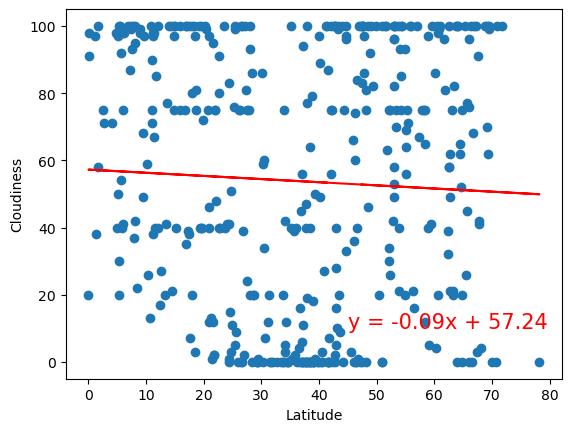

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
regress_plot(x_values, y_values, 45, 10, "Latitude", "Cloudiness")
plt.show()

The r-squared is: 0.0047155206437054465


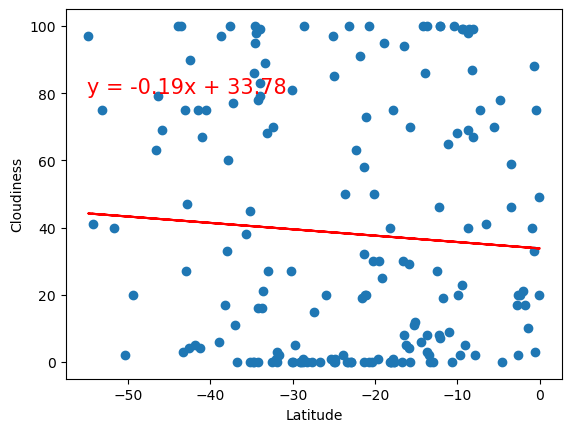

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
regress_plot(x_values, y_values, -55, 80, "Latitude", "Cloudiness")
plt.show()

**Discussion about the linear relationship:** Cloudiness and latitude do not appear to be correlated, regardless of hemisphere. The r-squared values for both relationships is less that 0.1, indicating that there is little to no correlation between the data. The value for the southern hemisphere is slightly higher, but not enough to be statistically significant.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.019998856575444136


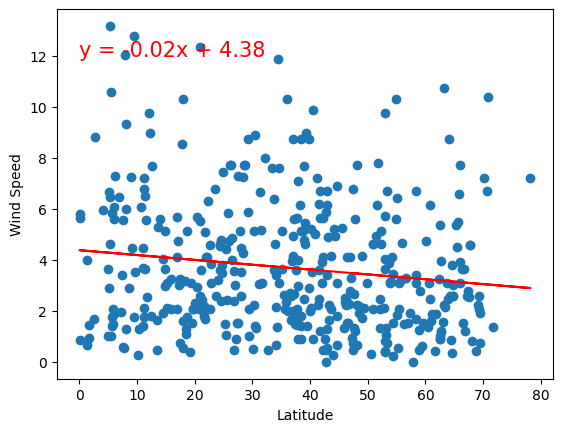

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
regress_plot(x_values, y_values, 0, 12, "Latitude", "Wind Speed")
plt.show()

The r-squared is: 0.0013075319506764677


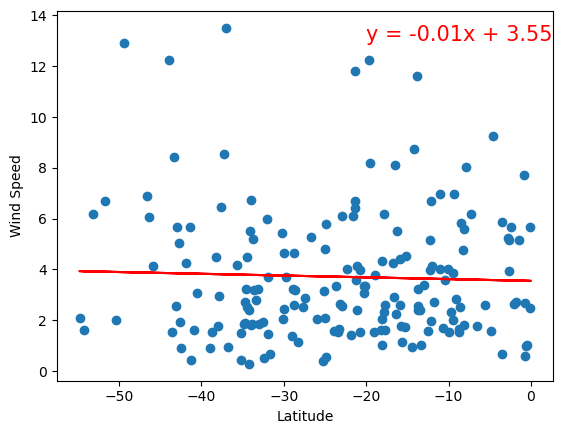

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
regress_plot(x_values, y_values, -20, 13, "Latitude", "Wind Speed")
plt.show()

**Discussion about the linear relationship:** Wind speed and latitude do not appear to be correlated, regardless of hemisphere. The r-squared values for both relationships is less that 0.1, indicating that there is little to no correlation between the data. The value for the northern hemisphere is several times greater than that of the southern hemisphere, but both numbers are so small that even this difference is not enough to be statistically significant. The dataset reviewed in this activity seems to suggest that, out of the factors tested, only temperature has a direct correlation to a city's distance from the equator.